In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
%matplotlib inline

In [3]:
def vis_data_grouped(data, name, groupby='alt'):
    fig, ax = plt.subplots()

    if groupby == 'alt':
        group_ranges = np.arange(0, np.max(data[:, 1]), 250)
        group_idx = 1
        y_idx = 2
        y_label = 'tgo'
        group_unit = 'm'
    elif groupby == 'tgo':
        group_ranges = np.arange(0, np.max(data[:, 2]), 20)
        group_idx = 2
        y_idx = 1
        y_label = 'alt'
        group_unit = 's'
    else:
        raise ValueError(f'Invalid groupby: {groupby}')

    # Define colors for each group
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i in range(len(group_ranges)-1):
        group = data[(data[:, group_idx] >= group_ranges[i]) & (data[:, group_idx] < group_ranges[i+1])]

        # Calculate convex hull for each group
        if len(group) >= 3:  # ConvexHull requires at least 3 points in 2D
            hull = ConvexHull(group[:, [0, y_idx]])
            for s in hull.simplices:
                ax.plot(group[s, 0], group[s, y_idx], color=colors[i % len(colors)])
            
            # Annotation for each group
            ax.text(np.mean(group[:, 0]), np.mean(group[:, y_idx]), f'{group_ranges[i]}-{group_ranges[i+1]} {group_unit}', color=colors[i % len(colors)])
            
    ax.set_xlabel(name)
    ax.set_ylabel(y_label)
    plt.show()

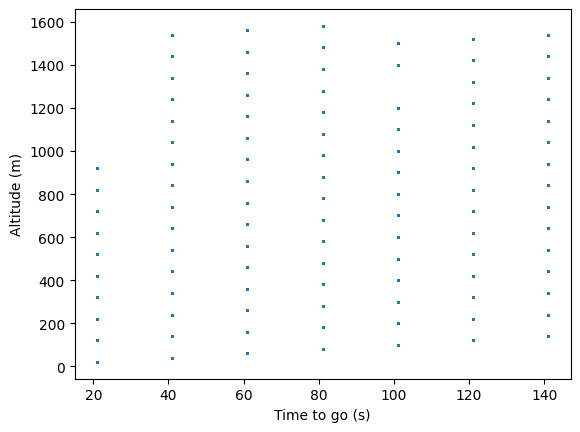

In [42]:
data = np.load("../out/controllable_set/20231108-144422/data.npy")
data = data[(data[:, 3] >= 0)]

fig, ax = plt.subplots()
ax.scatter(data[:, 7], data[:, 2], s=1, alpha=0.5)
ax.set_ylabel('Altitude (m)')
ax.set_xlabel('Time to go (s)')
plt.show()

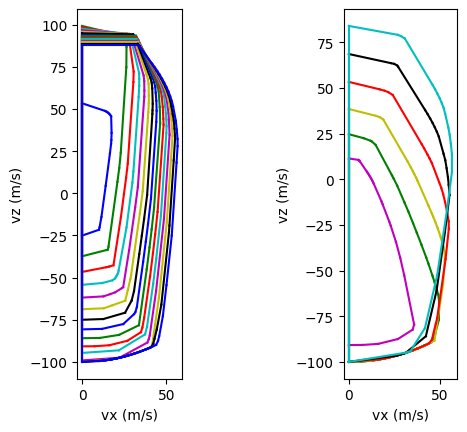

In [43]:
fig, axs = plt.subplots(1, 2)

x_idx = 3  # vx
y_idx = 5  # vz
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# group by algitude
group_idx = 2
group_ranges = np.arange(0, np.max(data[:, group_idx]), 100)

for i in range(len(group_ranges)-1):
        group = data[(data[:, group_idx] >= group_ranges[i]) & (data[:, group_idx] < group_ranges[i+1])]
        #axs[0].scatter(group[:, x_idx], group[:, y_idx], s=1, alpha=0.5, color=colors[i % len(colors)])
        # Calculate convex hull for each group
        if len(group) >= 3:  # ConvexHull requires at least 3 points in 2D
            hull = ConvexHull(group[:, [x_idx, y_idx]])
            for s in hull.simplices:
                axs[0].plot(group[s, x_idx], group[s, y_idx], color=colors[i % len(colors)])

# group by time to go
group_idx = 7
group_ranges = np.arange(0, np.max(data[:, group_idx]), 5)

for i in range(len(group_ranges)-1):
        group = data[(data[:, group_idx] >= group_ranges[i]) & (data[:, group_idx] < group_ranges[i+1])]
        # Calculate convex hull for each group
        if len(group) >= 3:  # ConvexHull requires at least 3 points in 2D
            hull = ConvexHull(group[:, [x_idx, y_idx]])
            for s in hull.simplices:
                axs[1].plot(group[s, x_idx], group[s, y_idx], color=colors[i % len(colors)])

for ax in axs:
    ax.set_xlabel('vx (m/s)')
    ax.set_ylabel('vz (m/s)')
    # aspect ratio
    ax.set_aspect('equal', 'box')
plt.show()


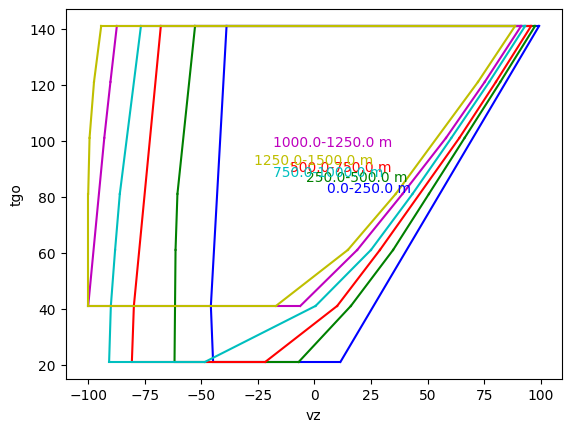

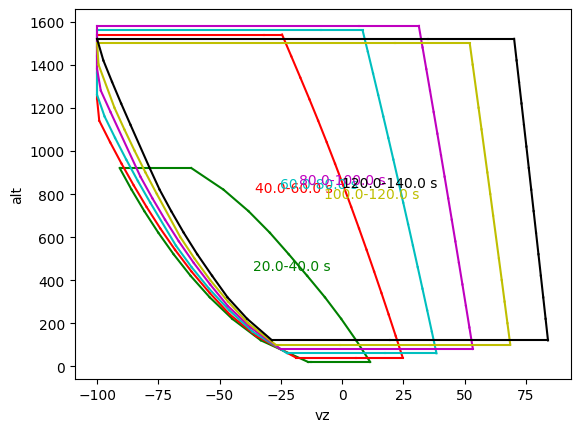

In [44]:
vz_data = data[:, [5, 2, 7]]
vis_data_grouped(vz_data, "vz", groupby='alt')
vis_data_grouped(vz_data, "vz", groupby='tgo')

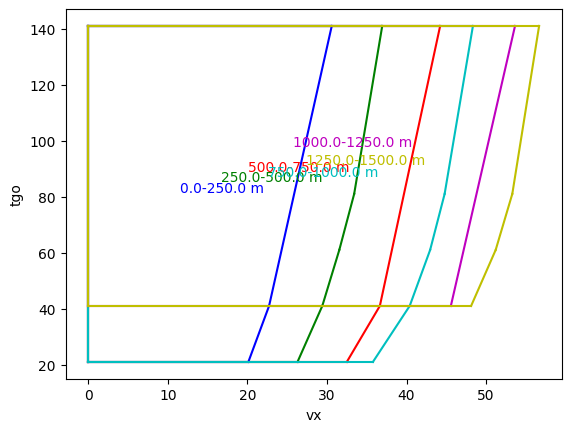

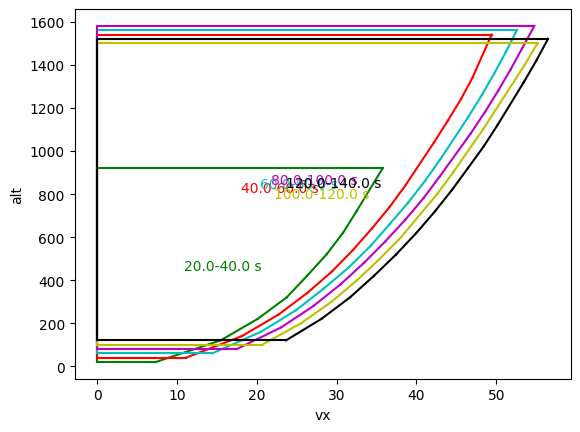

In [45]:
vx_data = data[:, [3, 2, 7]]
vis_data_grouped(vx_data, "vx", groupby='alt')
vis_data_grouped(vx_data, "vx", groupby='tgo')

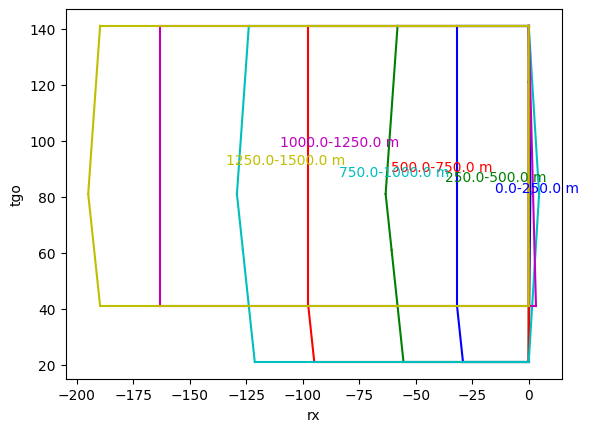

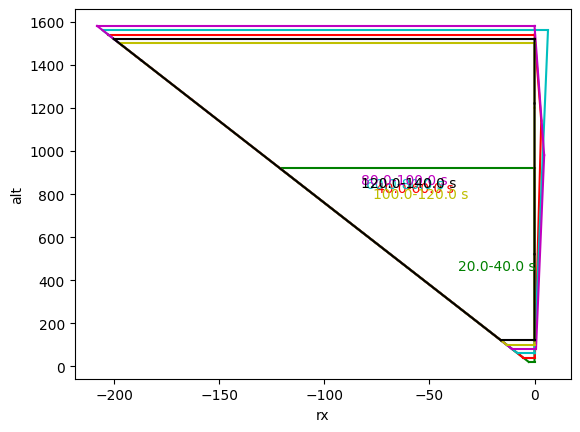

In [46]:
rx_data = data[:, [0, 2, 7]]
vis_data_grouped(rx_data, "rx", groupby='alt')
vis_data_grouped(rx_data, "rx", groupby='tgo')

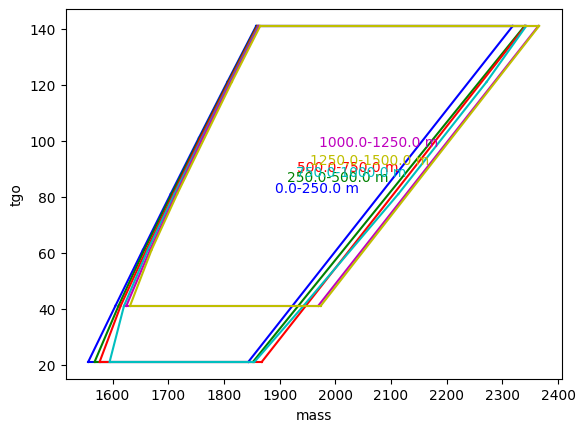

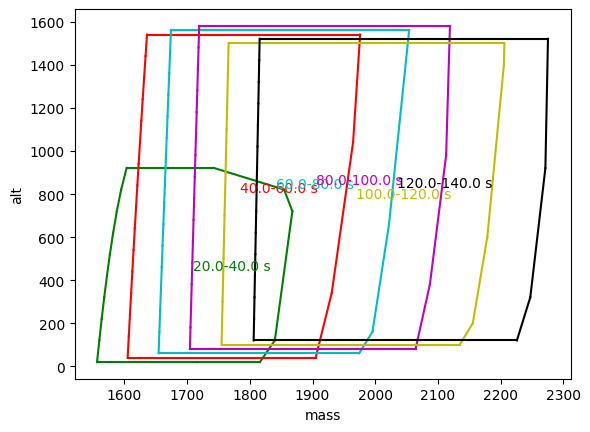

In [47]:
m_data = data[:, [6, 2, 7]]
vis_data_grouped(m_data, "mass", groupby='alt')
vis_data_grouped(m_data, "mass", groupby='tgo')

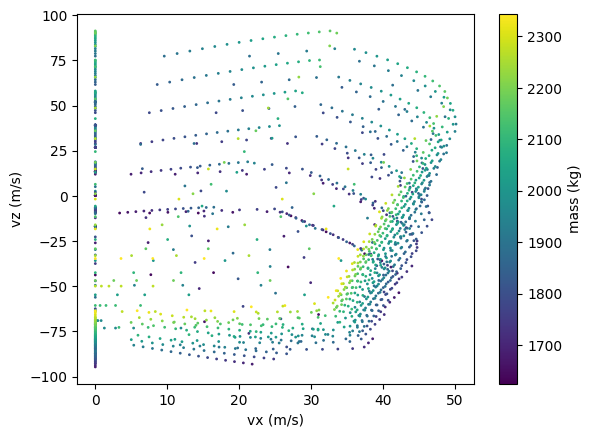

In [48]:
# group by altitude
groupby_idx = 2
group_ranges = np.arange(0, np.max(data[:, groupby_idx]), 100)
group_idx = 10
group = data[(data[:, groupby_idx] >= group_ranges[group_idx]) & (data[:, groupby_idx] < group_ranges[group_idx+1])]

fig, ax = plt.subplots()
scatter = ax.scatter(group[:, 3], group[:, 5], s=1, c=group[:, 6])
ax.set_xlabel('vx (m/s)')
ax.set_ylabel('vz (m/s)')

cb = fig.colorbar(scatter)
cb.set_label('mass (kg)')

plt.show()

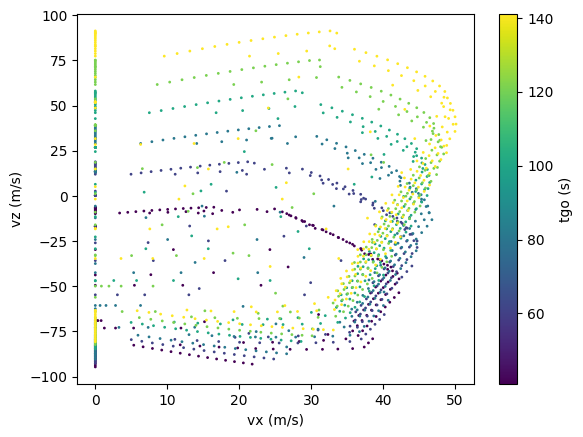

In [49]:
# group by altitude
groupby_idx = 2
group_ranges = np.arange(0, np.max(data[:, groupby_idx]), 100)
group_idx = 10
group = data[(data[:, groupby_idx] >= group_ranges[group_idx]) & (data[:, groupby_idx] < group_ranges[group_idx+1])]

fig, ax = plt.subplots()
scatter = ax.scatter(group[:, 3], group[:, 5], s=1, c=group[:, 7])
ax.set_xlabel('vx (m/s)')
ax.set_ylabel('vz (m/s)')

cb = fig.colorbar(scatter)
cb.set_label('tgo (s)')

plt.show()

In [50]:
data.shape

(22581, 9)

In [51]:
import pandas as pd
import seaborn as sns

In [52]:
df = pd.DataFrame(data, columns=['rx', 'ry', 'rz', 'vx', 'vy', 'vz', 'm0', 'tgo', 'mf'])

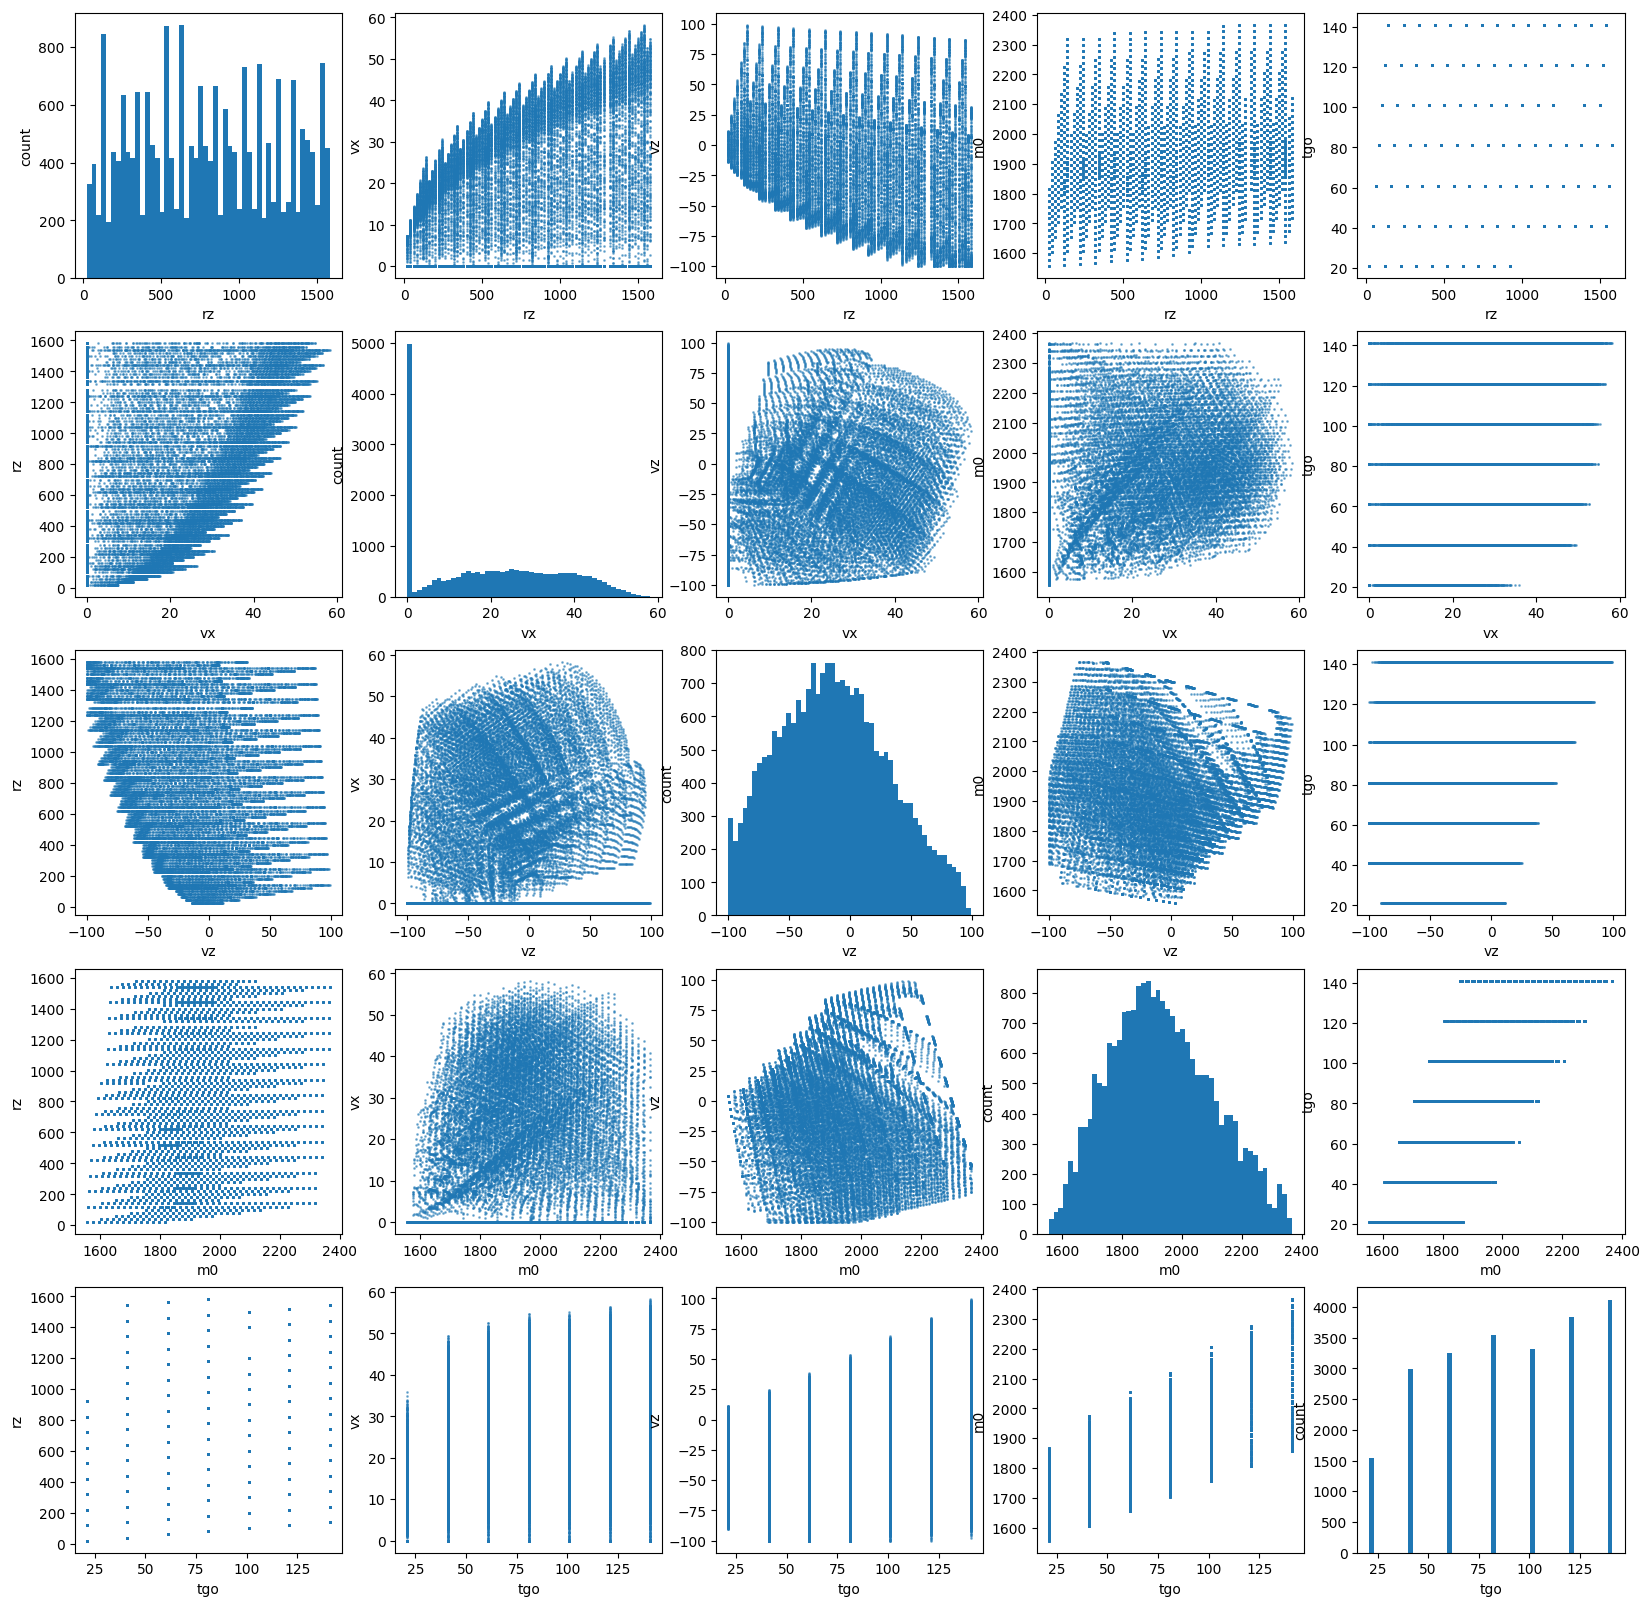

In [53]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
names = ['rx', 'ry', 'rz', 'vx', 'vy', 'vz', 'm0', 'tgo', 'mf']
indices = [2, 3, 5, 6, 7]
for i, x_idx in enumerate(indices):
    for j, y_idx in enumerate(indices):
        if j==i: 
            axs[i, j].hist(data[:, x_idx], bins=50)
            axs[i, j].set_xlabel(f'{names[x_idx]}')
            axs[i, j].set_ylabel('count')
        else:
            axs[i, j].scatter(data[:, x_idx], data[:, y_idx], s=1, alpha=0.5)
            axs[i, j].set_xlabel(f'{names[x_idx]}')
            axs[i, j].set_ylabel(f'{names[y_idx]}')

plt.show()

In [58]:
m0_ranges = np.arange(np.min(data[:, 6]), np.max(data[:, 6]), 100)
alt_ranges = np.arange(np.min(data[:, 2]), np.max(data[:, 2]), 200)
tgo_ranges = np.arange(np.min(data[:, 7]), np.max(data[:, 7]), 20)

n_m0 = len(m0_ranges) - 1
n_alt = len(alt_ranges) - 1
n_tgo = len(tgo_ranges) - 1
print(n_m0, n_alt, n_tgo)

8 7 5


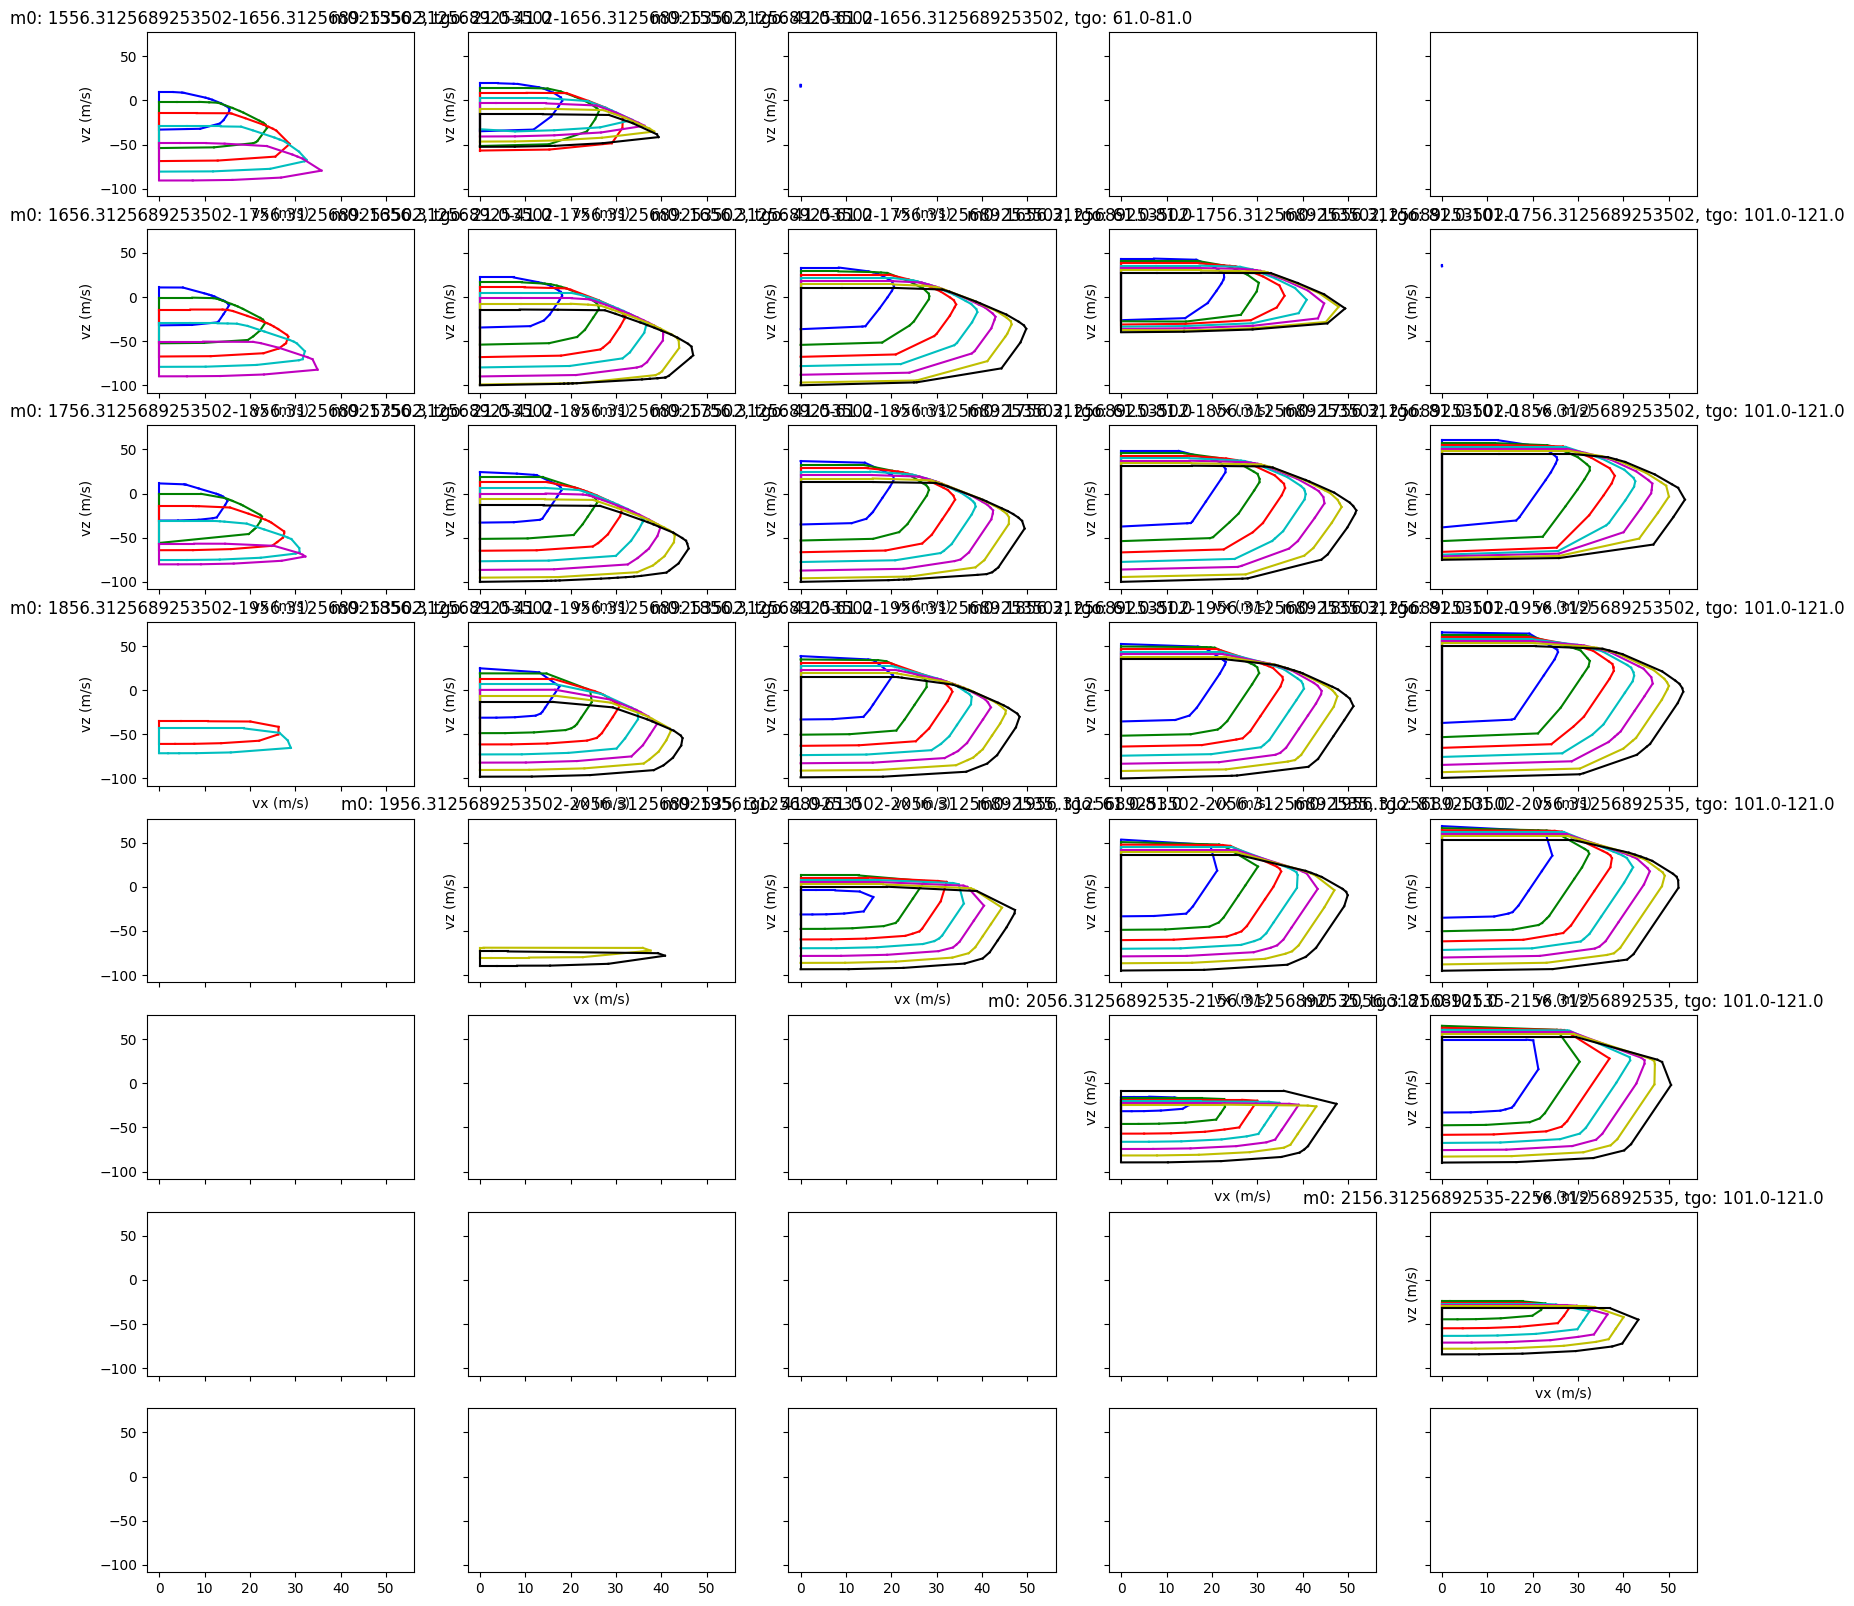

In [59]:
fig, axs = plt.subplots(n_m0, n_tgo, figsize=(20, 20), sharex=True, sharey=True)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(n_m0):
    for j in range(n_tgo):
        group = data[(data[:, 6] >= m0_ranges[i]) & (data[:, 6] < m0_ranges[i+1]) & (data[:, 7] >= tgo_ranges[j]) & (data[:, 7] < tgo_ranges[j+1])]
        
        for k in range(n_alt):
            subgroup = group[(group[:, 2] >= alt_ranges[k]) & (group[:, 2] < alt_ranges[k+1])]
            if len(subgroup) >= 3:
                hull = ConvexHull(subgroup[:, [3, 5]])
                for s in hull.simplices:
                    axs[i, j].plot(subgroup[s, 3], subgroup[s, 5], color=colors[k % len(colors)])
                    axs[i, j].set_xlabel('vx (m/s)')
                    axs[i, j].set_ylabel('vz (m/s)')
                    axs[i, j].set_title(f'm0: {m0_ranges[i]}-{m0_ranges[i+1]}, tgo: {tgo_ranges[j]}-{tgo_ranges[j+1]}')
plt.show()